In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from datetime import datetime
%matplotlib inline

In [2]:
#Dataset 1
movies=pd.read_csv('movie_ratings.csv') 
movies=movies.dropna()
date = pd.to_datetime(datetime.now().date())
movies['years since release'] = movies['year'].apply(lambda x: 2021-x)
movies.head()

,Unnamed: 0,movie,year,imdb,metascore,votes,n_imdb,years since release
0,0,Gladiator,2000,8.5,67,1395652,85.0,21
1,1,Memento,2000,8.4,80,1167025,84.0,21
2,2,Snatch,2000,8.3,55,810061,83.0,21
3,3,Requiem for a Dream,2000,8.3,68,794274,83.0,21
4,4,X-Men,2000,7.4,64,587178,74.0,21


In [3]:
#Dataset 2
movies1=pd.read_csv('movies_grossvalue.csv') 
movies1=movies1.dropna()
movies1

,Unnamed: 0,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,0,Joker,2019,122,8.5,59.0,808270,335.45
1,1,Parasite,2019,132,8.6,96.0,426750,53.37
2,2,Knives Out,2019,130,7.9,82.0,319809,165.36
3,3,Once Upon a Time... in Hollywood,2019,161,7.7,83.0,478002,142.50
5,5,1917,2019,119,8.3,78.0,326813,159.23
...,...,...,...,...,...,...,...,...
987,987,Le Dîner de Cons,1998,80,7.7,73.0,36285,4.07
989,989,The Shop Around the Corner,1940,99,8.1,96.0,26392,0.20
992,992,The Muppet Christmas Carol,1992,85,7.7,64.0,46082,27.28
994,994,Joyeux Noel,2005,116,7.7,70.0,26953,1.05


In [4]:
#merge two dataset
#Delete duplicates and drop rows with null 
movies=pd.merge(movies,movies1,how='inner',on=['movie'])
movies.dropna(inplace=True)
movies

,Unnamed: 0_x,movie,year_x,imdb,metascore_x,votes,n_imdb,years since release,Unnamed: 0_y,year_y,time_minute,imdb_rating,metascore_y,vote,gross_earning
0,0,Gladiator,2000,8.5,67,1395652,85.0,21,61,2000,155,8.5,67.0,1293620,187.71
1,47,Gladiator,2000,8.5,67,1395652,85.0,21,61,2000,155,8.5,67.0,1293620,187.71
2,94,Gladiator,2000,8.5,67,1395652,85.0,21,61,2000,155,8.5,67.0,1293620,187.71
3,141,Gladiator,2000,8.5,67,1395652,85.0,21,61,2000,155,8.5,67.0,1293620,187.71
4,1,Memento,2000,8.4,80,1167025,84.0,21,108,2000,113,8.4,80.0,1087118,25.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,3229,Wind River,2017,7.7,73,221640,77.0,4,71,2017,107,7.7,73.0,191703,33.80
1068,3107,Ghost in the Shell,2017,6.3,52,204918,63.0,4,532,1995,83,8.0,76.0,123868,0.52
1069,3149,Ghost in the Shell,2017,6.3,52,204918,63.0,4,532,1995,83,8.0,76.0,123868,0.52
1070,3191,Ghost in the Shell,2017,6.3,52,204918,63.0,4,532,1995,83,8.0,76.0,123868,0.52


In [5]:
moviesdrop=movies.drop(['Unnamed: 0_x', 'year_y','Unnamed: 0_y','imdb_rating','metascore_y','vote'], axis=1)
moviesdrop=moviesdrop.drop_duplicates(subset="movie", keep="last")
movies=moviesdrop.rename(columns={"year_x": "year", "metascore_x": "metascore"})

No handles with labels found to put in legend.


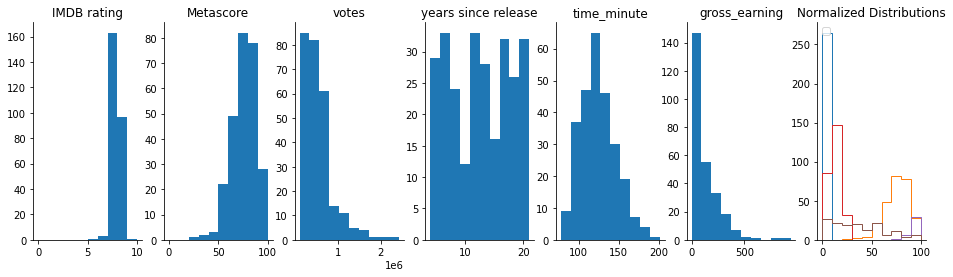

In [6]:
import matplotlib.pyplot as plt
movie_ratings=movies
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (16,4))
ax1, ax2, ax3, ax4, ax5, ax6, ax7 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) 
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) 
ax2.set_title('Metascore')
ax3.hist(movie_ratings['votes']) 
ax3.set_title('votes')
ax4.hist(movie_ratings['years since release']) 
ax4.set_title('years since release')
ax5.hist(movie_ratings['time_minute']) 
ax5.set_title('time_minute')
ax6.hist(movie_ratings['gross_earning']) 
ax6.set_title('gross_earning')
ax7.hist(movie_ratings['imdb'], bins = 10, range = (0,100), histtype = 'step')
ax7.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax7.hist(movie_ratings['votes'], bins = 10, range = (0,100), histtype = 'step')
ax7.hist(movie_ratings['years since release'], bins = 10, range = (0,100), histtype = 'step')
ax7.hist(movie_ratings['time_minute'], bins = 10, range = (0,100), histtype = 'step')
ax7.hist(movie_ratings['gross_earning'], bins = 10, range = (0,100), histtype = 'step')
ax7.legend(loc = 'upper left')
ax7.set_title('Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

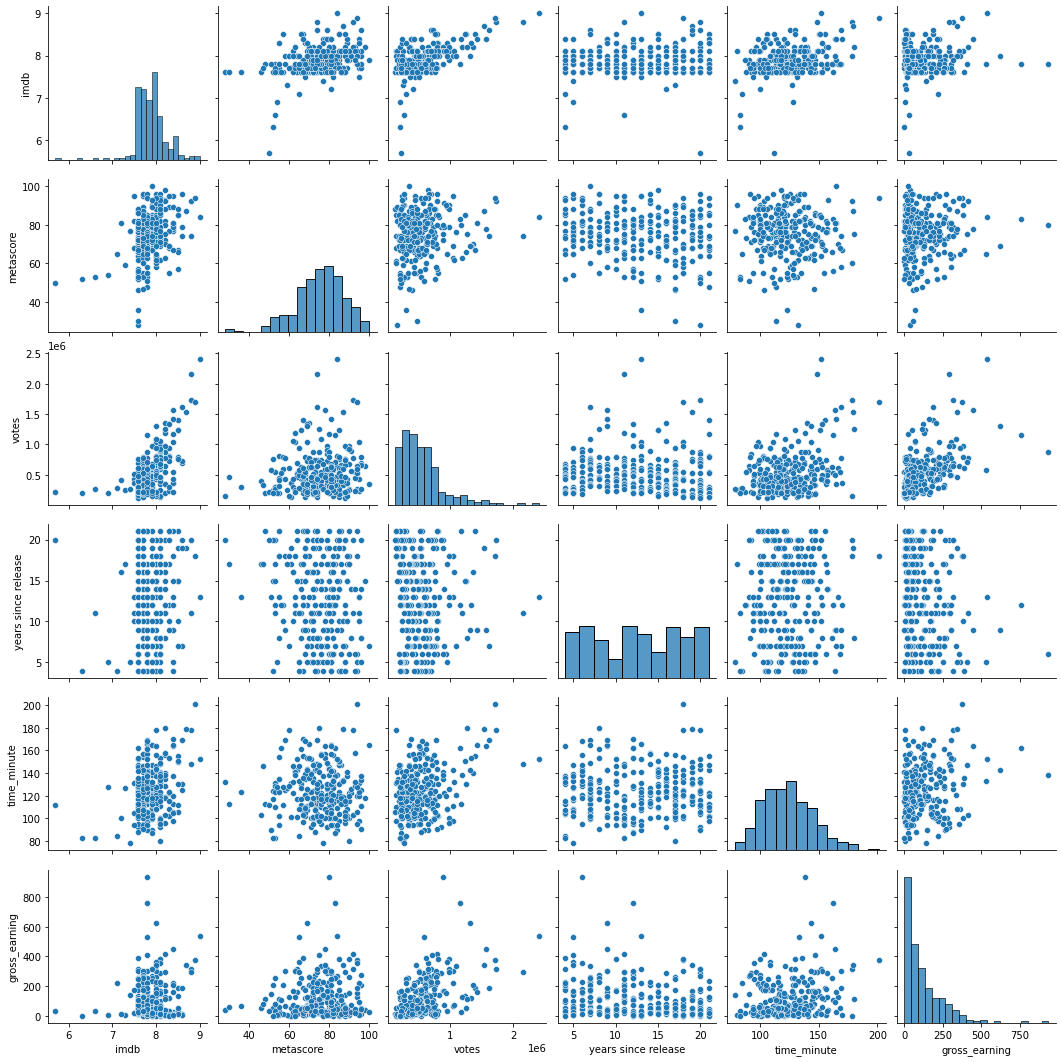

In [7]:
import seaborn as sns
sns.pairplot(movies[['imdb','metascore','votes','years since release','time_minute','gross_earning']].dropna())

# Running regression on training set with all features 

In [8]:
x=movies[['imdb','metascore','votes','years since release','time_minute']]
x=sm.add_constant(x)
model = sm.OLS(movies['gross_earning'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gross_earning   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     32.22
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.72e-25
Time:                        08:37:45   Log-Likelihood:                -1603.6
No. Observations:                 265   AIC:                             3219.
Df Residuals:                     259   BIC:                             3241.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 804.1760    174.428      4.610      0.000     460.697    1147.655
imdb                 -112.9820     25.024     -4.515      0.000    -162.258     -63.706
metascore               0.7416      0.582      1.275      0.204      -0.404       1.887
votes                   0.0003   2.38e-05     10.752      0.000       0.000       0.000
years since release    -4.4981      1.263     -3.560      0.000      -6.986      -2.010
time_minute             0.5500      0.327      1.680      0.094      -0.095       1.195
==============================================================================
Omnibus:                      123.008   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.343
Skew:                           1.747   Prob(JB):                    3.60e-175
Kurtosis:                      10.781   Cond. No.                     1.78e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature 

In [9]:
movies

,movie,year,imdb,metascore,votes,n_imdb,years since release,time_minute,gross_earning
3,Gladiator,2000,8.5,67,1395652,85.0,21,155,187.71
7,Memento,2000,8.4,80,1167025,84.0,21,113,25.54
11,Snatch,2000,8.3,55,810061,83.0,21,102,30.33
15,Requiem for a Dream,2000,8.3,68,794274,83.0,21,102,3.64
19,Cast Away,2000,7.8,73,550152,78.0,21,143,233.63
...,...,...,...,...,...,...,...,...,...
1055,Coco,2017,8.4,81,429638,84.0,4,105,209.73
1059,Beauty and the Beast,2017,7.1,65,287327,71.0,4,84,218.97
1063,Call Me by Your Name,2017,7.9,93,235042,79.0,4,132,18.10
1067,Wind River,2017,7.7,73,221640,77.0,4,107,33.80


R-squared: 0.0459


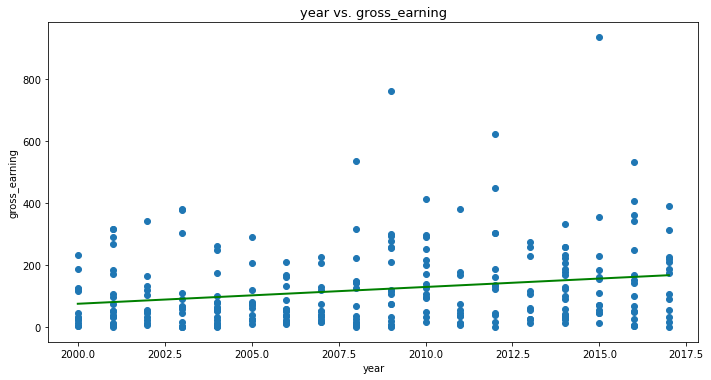

In [10]:
X, y = movies[['year']], movies['gross_earning']
lr = LinearRegression()
lr.fit(X, y)
print('R squared: {:.3f}'.format(lr.score(X, y)))
x1=movies.year
y=movies.gross_earning
rgr = linear_model.LinearRegression()
rgr.fit(x1.values.reshape(len(x1),1),y)
fig=plt.figure(figsize=(10,15))
plt.scatter(x1,y)
plt.plot(x1,rgr.predict(x1.values.reshape(len(x1),1)),color='green',linewidth=3,markersize=3)
ax.set_title('year vs. gross_earning',fontsize=13)
ax.set_xlabel('year',fontsize=10)
ax.set_ylabel('gross_earning',fontsize=10)
fig.tight_layout()

R-squared: 0.0215


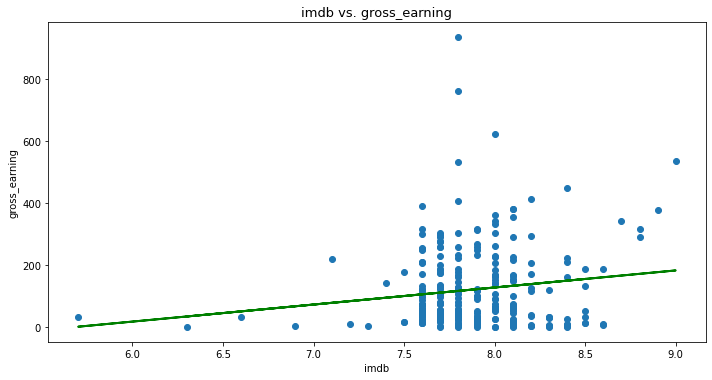

In [11]:
X, y = movies[['imdb']], movies['gross_earning']
lr = LinearRegression()
lr.fit(X, y)
print('R squared: {:.3f}'.format(lr.score(X, y)))
x1=movies.imdb
y=movies.gross_earning
rgr = linear_model.LinearRegression()
rgr.fit(x1.values.reshape(len(x1),1),y)
fig=plt.figure(figsize=(10,15))
plt.scatter(x1,y)
plt.plot(x1,rgr.predict(x1.values.reshape(len(x1),1)),color='green',linewidth=3,markersize=3)
ax.set_title('imdb vs. gross_earning',fontsize=13)
ax.set_xlabel('imdb',fontsize=10)
ax.set_ylabel('gross_earning',fontsize=10)
fig.tight_layout()


R-squared: 0.0084


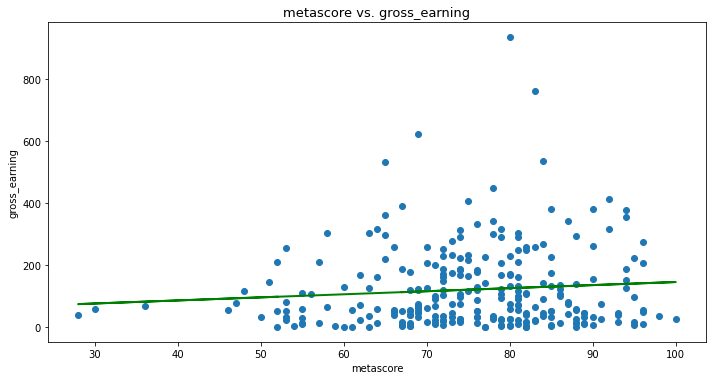

In [12]:
X, y = movies[['metascore']], movies['gross_earning']
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.3f}'.format(lr.score(X, y)))
x1=movies.metascore
y=movies.gross_earning
rgr = linear_model.LinearRegression()
rgr.fit(x1.values.reshape(len(x1),1),y)
fig=plt.figure(figsize=(10,15))
plt.scatter(x1,y)
plt.plot(x1,rgr.predict(x1.values.reshape(len(x1),1)),color='green',linewidth=3,markersize=3)
ax.set_title('metascore vs. gross_earning',fontsize=13)
ax.set_xlabel('metascore',fontsize=10)
ax.set_ylabel('gross_earning',fontsize=10)
fig.tight_layout()

R-squared: 0.2901


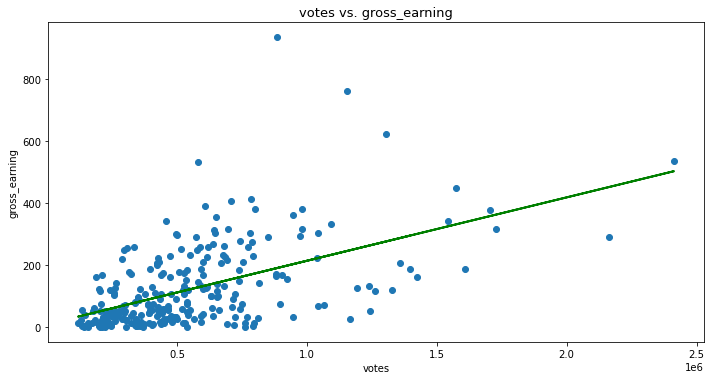

In [13]:
X, y = movies[['votes']], movies['gross_earning']
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.3f}'.format(lr.score(X, y)))
x1=movies.votes
y=movies.gross_earning
rgr = linear_model.LinearRegression()
rgr.fit(x1.values.reshape(len(x1),1),y)
fig=plt.figure(figsize=(10,15))
plt.scatter(x1,y)
plt.plot(x1,rgr.predict(x1.values.reshape(len(x1),1)),color='green',linewidth=3,markersize=3)
ax.set_title('votes vs. gross_earning',fontsize=13)
ax.set_xlabel('votes',fontsize=10)
ax.set_ylabel('gross_earning',fontsize=10)
fig.tight_layout()

R-squared: 0.0501


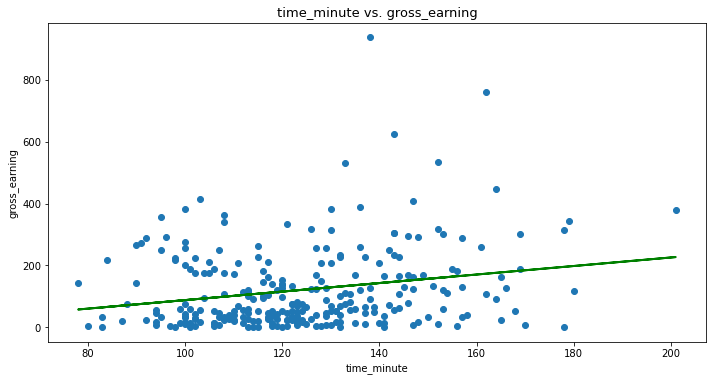

In [14]:
X, y = movies[['time_minute']], movies['gross_earning']
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.3f}'.format(lr.score(X, y)))
x1=movies.time_minute
y=movies.gross_earning
rgr = linear_model.LinearRegression()
rgr.fit(x1.values.reshape(len(x1),1),y)
fig=plt.figure(figsize=(10,15))
plt.scatter(x1,y)
plt.plot(x1,rgr.predict(x1.values.reshape(len(x1),1)),color='green',linewidth=3,markersize=3)
ax.set_title('time_minute vs. gross_earning',fontsize=13)
ax.set_xlabel('time_minute',fontsize=10)
ax.set_ylabel('gross_earning',fontsize=10)
fig.tight_layout()

# Train / Validation / Test

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

In [16]:
movies

,movie,year,imdb,metascore,votes,n_imdb,years since release,time_minute,gross_earning
3,Gladiator,2000,8.5,67,1395652,85.0,21,155,187.71
7,Memento,2000,8.4,80,1167025,84.0,21,113,25.54
11,Snatch,2000,8.3,55,810061,83.0,21,102,30.33
15,Requiem for a Dream,2000,8.3,68,794274,83.0,21,102,3.64
19,Cast Away,2000,7.8,73,550152,78.0,21,143,233.63
...,...,...,...,...,...,...,...,...,...
1055,Coco,2017,8.4,81,429638,84.0,4,105,209.73
1059,Beauty and the Beast,2017,7.1,65,287327,71.0,4,84,218.97
1063,Call Me by Your Name,2017,7.9,93,235042,79.0,4,132,18.10
1067,Wind River,2017,7.7,73,221640,77.0,4,107,33.80


In [17]:
X, y = movies.drop(columns=['movie','year','imdb','gross_earning']), movies['gross_earning']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=20)
lr = LinearRegression()

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()
lr.fit(X_train, y_train)
print(f'Linear Regression val R-squared: {lr.score(X_val, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'2 Degree polynomial regression val R-squared: {lr_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R-squared: 0.222
2 Degree polynomial regression val R-squared: 0.285


In [18]:
X, y = movies.drop(columns=['movie','year','imdb','gross_earning']), movies['gross_earning']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X, y = np.array(X), np.array(y) 
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state = 61)
cv_lr_r2s, cv_lr_reg_r2s = [], []
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    lr = LinearRegression()
    lr_reg = Ridge(alpha=1)
    lr.fit(X_train, y_train)
    cv_lr_r2s.append(lr.score(X_val, y_val))
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lr_reg.fit(X_train_scaled, y_train)
    cv_lr_reg_r2s.append(lr_reg.score(X_val_scaled, y_val))
print('Ridge scores: ', cv_lr_reg_r2s, '\n')
print(f'Ridge mean cv R-squared: {np.mean(cv_lr_reg_r2s):.3f}')

Ridge scores:  [-0.08806390413665621, 0.41486440624382603, 0.37421275754667216, 0.3636119187499306, 0.510595640933933] 

Ridge mean cv R-squared: 0.315 +- 0.208


Ridge R-squared: 0.3845
MAE: 76.6852


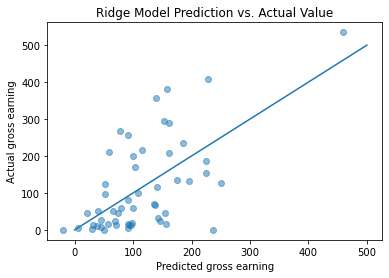

In [19]:
X, y = movies.drop(columns=['movie','year','imdb','gross_earning']), movies['gross_earning']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_reg.fit(X_train_scaled, y_train);
test_set_pred = lr_reg.predict(X_test_scaled)
print('Ridge R-squared: {:.3f}'.format(r2_score(y_test, test_set_pred))) 
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 
print('MAE: {:.3f}'.format(mae(y_test, test_set_pred)))
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,500), np.linspace(0,500))
plt.title('Ridge Model Prediction vs. Actual Value')
plt.xlabel('Predicted gross earning')
plt.ylabel('Actual gross earning');

In [20]:
def plot(x, y):
    plt.figure(figsize=(15,5))
    pred = x
    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot");

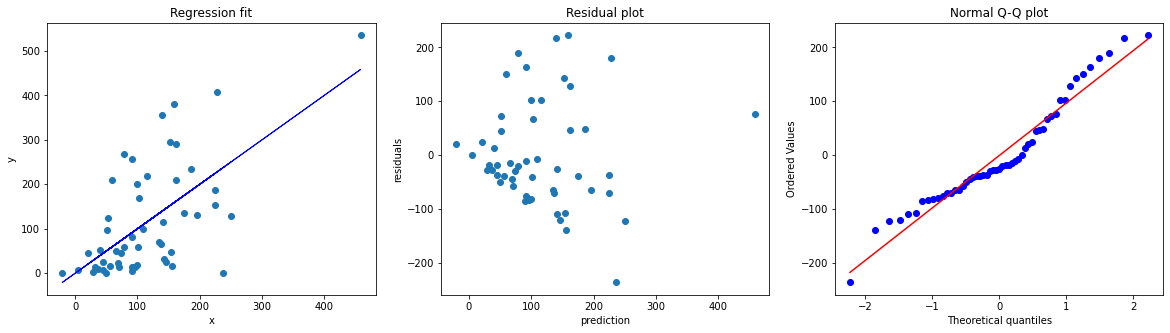

In [21]:
plot(test_set_pred, y_test)


# Alpha value for ridge

In [22]:
m_alpha = RidgeCV(alphas=[0.1, 1.0, 10.0])
model_cv = m_alpha.fit(X_train_scaled, y_train)
print('Best Alpha: {}'.format(model_cv.alpha_))

Best Alpha: 10.0


Ridge r2: 0.38873
Ridge MAE 77.26479


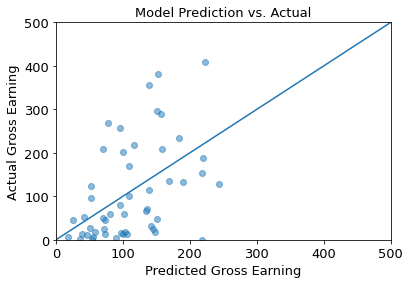

In [23]:
ridge_m = Ridge(alpha=10)
ridge_m.fit(X_train_scaled,y_train)
print('Ridge r2: {:.3f}'.format(ridge_m.score(X_test_scaled, y_test)))
model_pred = ridge_m.predict(X_test_scaled)
print('Ridge MAE {:.3f}'.format(mae(model_pred, y_test)))
plt.scatter(model_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,500), np.linspace(0,500))
plt.title('Model Prediction vs. Actual',fontdict = {'fontsize' : 13})
plt.xlabel('Predicted Gross Earning',fontdict = {'fontsize' : 13})
plt.ylabel('Actual Gross Earning',fontdict = {'fontsize' : 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axis([0,500,0,500])
plt.show()

# The Importance of Features

In [24]:
coef_zip = list(zip(movies.drop(columns=['movie','year','imdb','gross_earning']).columns.tolist(),ridge_m.coef_ ))
sorted_coef = sorted(coef_zip, key = lambda x: abs(x[1])) 
sorted_coef

[('metascore', 4.774668700637881),
 ('time_minute', 17.46944969801278),
 ('years since release', -27.49471952261027),
 ('n_imdb', -37.54978196993764),
 ('votes', 74.30005043987869)]

# bulid a dataframe and plot a figure

In [33]:
data = pd.DataFrame(np.array([[4.77, 17.4, 27.49,37.54,74.3]]),
                   columns=['metascore', 'time_minute', 'years since release','n_imdb','votes'])

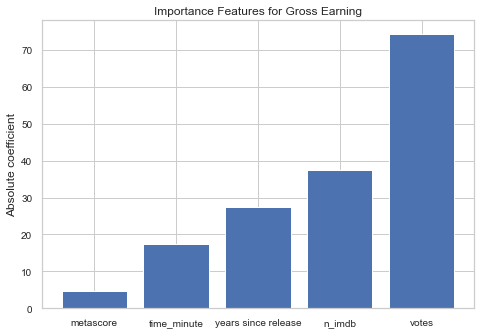

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['metascore', 'time_minute', 'years since release','n_imdb','votes']
coef = [4.77, 17.4, 27.49,37.54,74.3]
ax.bar(columns,coef)
movie_coef.set_xlabel('Coefficient',fontsize=15)
movie_coef.set_ylabel('Feature',fontsize=18)


ax.set_ylabel('Absolute coefficient')
ax.set_title('Importance Features for Gross Earning')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()